# Verlet Methods and Preservation of Phase Space #

In [1]:
import numpy as np

# This is the Euler Method function we developed:

def euler_harmonic_oscillator(k, m, x0, t0, tf, v0, dt):
    '''
    Integrate the harmonic oscillator using Euler's Method.

    Parameters
    ----------
    k : float
        Spring Constant
    m : float
        Mass in kg
    x0 : float
        Initial position
    t0 : float
        Initial time
    tf : float
        Final time
    v0 : float
        Initial velocity
    dt : float
        Time interval

    Returns
    -------
    t_values : numpy.ndarray(dtype=float)
        The time values
    v_values : numpy.ndarray(dtype=float)
        The velocity values
    x_values : numpy.ndarray(dtype=float)
        The position values
    t_error : numpy.ndarray(dtype=float)
        The time values where error was calculated
    v_error : numpy.ndarray(dtype=float)
        The error in velocity
    x_error : numpy.ndarray(dtype=float)
        The error in position
    kinetic : numpy.ndarray(dtype=float)
        The kinetic energy 
    potential : numpy.ndarray(dtype=float)
        The potential energy
    '''
    t_values = np.arange(t0, tf+dt, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    e_predicted = np.zeros_like(t_values)
    x_error = []
    v_error = []
    t_error = []
    period = 2*np.pi*np.sqrt(m/k)

    x_values[0] = x0 
    v_values[0] = v0 
    e_predicted[0] = (k*x_values[0]**2)/2 + (m*v_values[0]**2)/2
    for i, t in enumerate(t_values[:-1]):
        v_values[i+1] = v_values[i] + dt*(-k/m)*x_values[i]
        x_values[i+1] = x_values[i] + dt*v_values[i]
        e_predicted[i+1] = e_predicted[i]*(1+(k/m)*dt**2)
        if ((t+dt) % period <= dt/2) or (-(((t+dt) % period) - period) <= dt/2):
            x_error.append(x_values[i+1]-x_values[0])
            v_error.append(v_values[i+1]-v_values[0])
            t_error.append(t+dt)

    potential = (k*x_values**2)/2
    kinetic = (m*v_values**2)/2
    return t_values, v_values, x_values, np.array(t_error), np.array(v_error), np.array(x_error), kinetic, potential, e_predicted

In [2]:
# This is the Euler-Cromer Method we developed:

def eulercromer_harmonic_oscillator(k, m, x0, t0, tf, v0, dt):
    '''
    Integrate the harmonic oscillator using the Euler-Cromer Method.

    Parameters
    ----------
    k : float
        Spring Constant
    m : float
        Mass in kg
    x0 : float
        Initial position
    t0 : float
        Initial time
    tf : float
        Final time
    v0 : float
        Initial velocity
    dt : float
        Time interval

    Returns
    -------
    t_values : numpy.ndarray(dtype=float)
        The time values
    v_values : numpy.ndarray(dtype=float)
        The velocity values
    x_values : numpy.ndarray(dtype=float)
        The position values
    t_error : numpy.ndarray(dtype=float)
        The time values where error was calculated
    v_error : numpy.ndarray(dtype=float)
        The error in velocity
    x_error : numpy.ndarray(dtype=float)
        The error in position
    kinetic : numpy.ndarray(dtype=float)
        The kinetic energy 
    potential : numpy.ndarray(dtype=float)
        The potential energy
    '''
    t_values = np.arange(t0, tf+dt, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    x_error = []
    v_error = []
    t_error = []
    period = 2*np.pi*np.sqrt(m/k)

    x_values[0] = x0 
    v_values[0] = v0 
    for i, t in enumerate(t_values[:-1]):
        v_values[i+1] = v_values[i] + dt*(-k/m)*x_values[i]
        x_values[i+1] = x_values[i] + dt*v_values[i+1]
        if ((t+dt) % period <= dt/2) or (-(((t+dt) % period) - period) <= dt/2):
            x_error.append(x_values[i+1]-x_values[0])
            v_error.append(v_values[i+1]-v_values[0])
            t_error.append(t+dt)

    potential = (k*x_values**2)/2
    kinetic = (m*v_values**2)/2
    return t_values, v_values, x_values, np.array(t_error), np.array(v_error), np.array(x_error), kinetic, potential

In [3]:
def position_verlet_harmonic_oscillator(k, m, x0, t0, tf, v0, dt):
    '''
    Integrate the harmonic oscillator using the position verlet Method.

    Parameters
    ----------
    k : float
        Spring Constant
    m : float
        Mass in kg
    x0 : float
        Initial position
    t0 : float
        Initial time
    tf : float
        Final time
    v0 : float
        Initial velocity
    dt : float
        Time interval

    Returns
    -------
    t_values : numpy.ndarray(dtype=float)
        The time values
    v_values : numpy.ndarray(dtype=float)
        The velocity values
    x_values : numpy.ndarray(dtype=float)
        The position values
    t_error : numpy.ndarray(dtype=float)
        The time values where error was calculated
    v_error : numpy.ndarray(dtype=float)
        The error in velocity
    x_error : numpy.ndarray(dtype=float)
        The error in position
    kinetic : numpy.ndarray(dtype=float)
        The kinetic energy 
    potential : numpy.ndarray(dtype=float)
        The potential energy
    '''
    t_values = np.arange(t0, tf+dt, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)
    x_error = []
    v_error = []
    t_error = []
    period = 2*np.pi*np.sqrt(m/k)

    x_values[0] = x0 
    v_values[0] = v0 
    prevpos = x_values[0] - v_values[0]*dt - 0.5*(k/m)*x_values[0]*dt**2
    for i, t in enumerate(t_values[:-1]):
        x_values[i+1] = 2*x_values[i] - prevpos - (k/m)*x_values[i]*dt**2
        v_values[i+1] = (x_values[i+1] - prevpos)/(2*dt)
        if ((t+dt) % period <= dt/2) or (-(((t+dt) % period) - period) <= dt/2):
            x_error.append(x_values[i+1]-x_values[0])
            v_error.append(v_values[i+1]-v_values[0])
            t_error.append(t+dt)
        prevpos = x_values[i]

    potential = (k*x_values**2)/2
    kinetic = (m*v_values**2)/2
    return t_values, v_values, x_values, np.array(t_error), np.array(v_error), np.array(x_error), kinetic, potential

In [4]:
import matplotlib.pyplot as plt

def make_plot():
    fig = plt.figure(figsize=(6.5, 9))
    gs = plt.GridSpec(ncols=1, nrows=8, height_ratios=[5, 5, 1, 5, 5, 1, 5, 5], hspace=0)
    ax = [fig.add_subplot(gs[0])]
    ax = ax + [
        fig.add_subplot(gs[1], sharex=ax[0]),
        fig.add_subplot(gs[3], sharex=ax[0]),
        fig.add_subplot(gs[4], sharex=ax[0]),
        fig.add_subplot(gs[6], sharex=ax[0]),
        fig.add_subplot(gs[7], sharex=ax[0]),
    ]

    # Plot of error in position
    for t in v_t_error:
        ax[0].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
    ax[0].plot(v_t_error, v_x_error, marker=".", color="k", label="Position Verlet", linestyle="solid")
    ax[0].set_ylabel("x(t)-x(0)")

    # Plot of position vs time
    for t in v_t_error:
        ax[1].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
    ax[1].plot(v_t_values, v_x_values, color="k", label="Position Verlet", linestyle="solid")
    ax[1].set_ylabel("x(t)")

    # Plot of error in velocity
    for t in v_t_error:
        ax[2].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
    ax[2].plot(v_t_error, v_x_error, marker=".", color="k", label="Position Verlet", linestyle="solid")
    ax[2].set_ylabel("v(t)-v(0)")

    # Plot of velocity vs time
    for t in v_t_error:
        ax[3].axvline(t, color="tab:red", lw=0.7, linestyle="dashed")
    ax[3].plot(v_t_values, v_v_values, color="k", label="Position Verlet", linestyle="solid")
    ax[3].set_ylabel("v(t)")

    # Plot of kinetic and potential energy
    ax[4].plot(v_t_values, v_kinetic, label="K(t) [Position Verlet]", color="tab:blue", linestyle="solid")
    ax[4].plot(v_t_values, v_potential, label="V(t) [Position Verlet]", color="tab:orange", linestyle="solid")
    ax[4].set_ylabel("K(t), V(t)")
    ax[4].legend(ncols=2, loc="upper center", borderaxespad=0.11, framealpha=1, fancybox=False, fontsize=8, handlelength=1.2, edgecolor="white")
    erange = (v_kinetic.max()-v_kinetic.min())
    ax[4].set_ylim(v_kinetic.min()-erange*0.1, v_kinetic.max()+erange*0.3)

    # Plot of total energy
    ax[5].plot(v_t_values, v_kinetic+v_potential, color="k", linestyle="solid", label="Position Verlet")
    ax[5].set_ylabel("E(t)")

    # Set xlim, xlabel, and xtick positions on plots (only need to do once because sharex=True in plt.subplots())
    ax[5].set_xlim(0, v_t_values.max())
    ax[5].set_xlabel("t")
    ax[0].xaxis.set_major_locator(plt.MultipleLocator(10))
    ax[0].xaxis.set_minor_locator(plt.MultipleLocator(5))

    # Turn on grid for each plot and shrink ticklabel fontsize
    for axis in ax:
        axis.grid()
        axis.tick_params(labelsize=8)

    # Turn off xaxis tick labels on all but bottom plot
    for axis in ax[:-1]:
        axis.tick_params(labelbottom=False)

    plt.show()

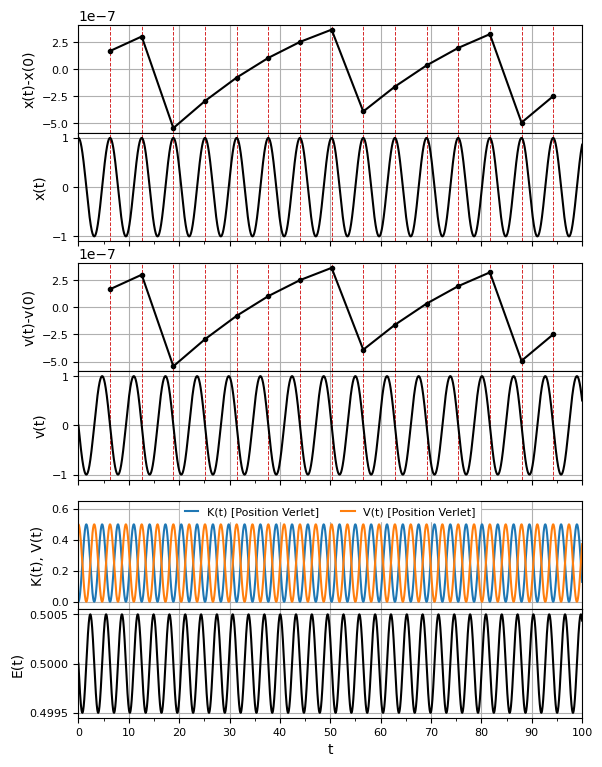

In [5]:
v_t_values, v_v_values, v_x_values, v_t_error, v_v_error, v_x_error, v_kinetic, v_potential = position_verlet_harmonic_oscillator(k=1.0, m=1.0, x0=1.0, t0=0.0, tf=100.0, v0=0.0, dt=0.001)
make_plot()

In [6]:
def phase_space_plots():
    fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True)

    ax[0].plot(v_x_values, v_v_values)
    ax[0].set_title("Position Verlet")
    ax[1].plot(e_x_values, e_v_values)
    ax[1].set_title("Euler")
    ax[2].plot(ec_x_values, ec_v_values)
    ax[2].set_title("Euler-Cromer")

    ax[0].set_xlabel("x(t)")
    ax[1].set_xlabel("x(t)")
    ax[2].set_xlabel("x(t)")
    ax[0].set_ylabel("v(t)")

    plt.show()

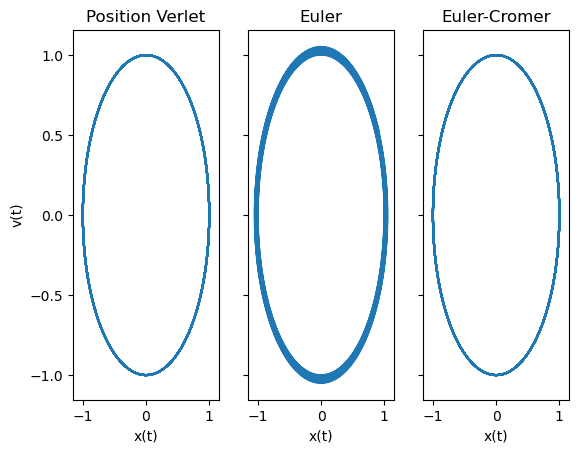

In [7]:
e_t_values, e_v_values, e_x_values, e_t_error, e_v_error, e_x_error, e_kinetic, e_potential, e_e_predicted = euler_harmonic_oscillator(k=1.0, m=1.0, x0=1.0, t0=0.0, tf=100.0, v0=0.0, dt=0.001)
ec_t_values, ec_v_values, ec_x_values, ec_t_error, ec_v_error, ec_x_error, ec_kinetic, ec_potential = eulercromer_harmonic_oscillator(k=1.0, m=1.0, x0=1.0, t0=0.0, tf=100.0, v0=0.0, dt=0.001)

phase_space_plots()